In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
%matplotlib inline

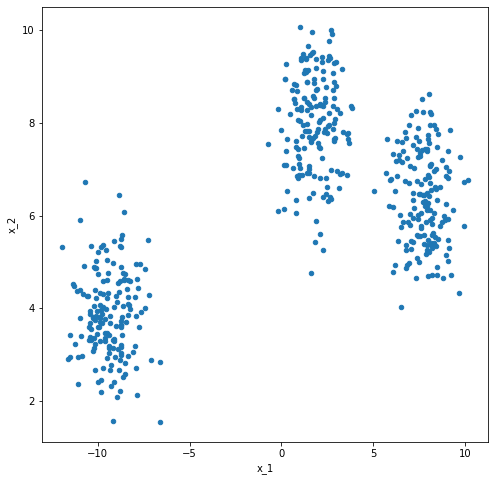

In [2]:
X, _= make_blobs(n_samples = 500, centers = 3, n_features = 2, center_box=(-10.0, 10.0),random_state = 20)

df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [3]:
combined_array = np.append(X, [7,7])
combined_array = combined_array.reshape(501,2)
combined_array

array([[-11.05794875,   2.35758008],
       [  3.30025999,   6.92264204],
       [-11.60050708,   2.89695028],
       ...,
       [  6.49003725,   6.0054937 ],
       [  1.53391876,   6.37801968],
       [  7.        ,   7.        ]])

In [4]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps = 1, min_samples = 5).fit(combined_array)
cluster = clustering.labels_

In [10]:
cluster

array([ 0,  1,  0,  0,  1,  1,  2,  2,  0,  0,  0,  1,  2,  2,  2,  0,  1,
        0,  2,  2,  0,  0,  1,  2,  1,  1,  0,  1,  0,  2,  2,  2,  1,  2,
        0,  1,  0,  2,  1,  1,  2,  1,  2,  2,  2,  2,  0,  0,  0,  2,  2,
        2,  1,  1,  1,  0,  2,  1,  2,  2,  0,  2,  2,  1,  2,  0,  0,  2,
        0,  2,  2,  1,  2,  2,  1,  0,  0,  0,  2,  0,  1,  1,  0,  0,  0,
        2,  2,  2,  0,  2,  0,  2,  2,  0,  0,  2,  1,  0,  2,  0,  1,  2,
        1,  0,  2,  2,  2,  1,  1,  0,  0, -1,  0,  0,  0,  1,  1,  0,  1,
        2,  1,  2,  2,  0,  0,  2,  1,  2,  1,  2,  0,  2,  1,  0,  1,  1,
        2,  0,  2,  1,  1,  2,  2,  1,  1,  1,  2,  0,  2,  1,  0,  0,  0,
        0,  0,  1,  2,  0,  1,  0,  2,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        2,  0,  1,  1,  2,  2,  2,  2,  0,  1,  1,  1,  1,  2,  0,  2,  1,
        2,  1,  2,  1,  1,  0,  1,  1,  1,  2,  2,  1,  1,  0,  2,  2,  1,
        0,  2,  2,  1,  2,  1,  0,  0,  1,  1,  0,  2,  1,  1,  0,  2,  0,
        2,  0,  2,  0,  2

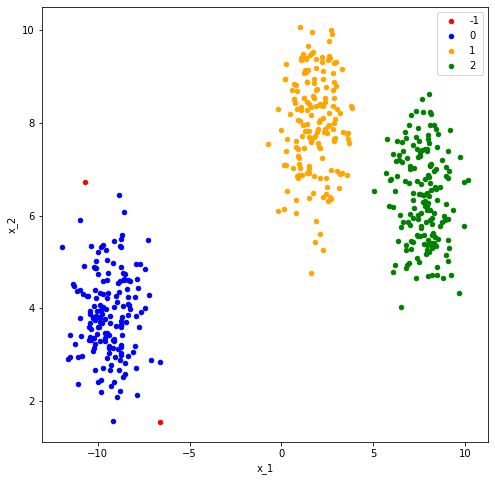

In [6]:
def show_clusters(X, cluster):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.show()
show_clusters(combined_array, cluster)